# Đề tài nhóm 6 về phân tích và dự đoán lá bị bệnh

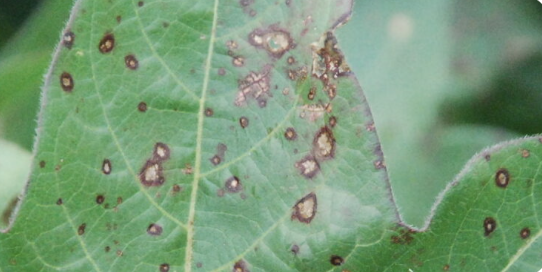

Đề tài “Phân loại lá cây bị bệnh bằng học sâu (Deep Learning)” được thực hiện nhằm xây dựng một mô hình học máy có khả năng tự động nhận dạng và phân loại các loại bệnh trên lá cây thông qua hình ảnh.
Mô hình sử dụng mạng nơ-ron tích chập (CNN), cụ thể là ResNet50 được huấn luyện trên tập dữ liệu gồm nhiều loại cây trồng khác nhau.
Hệ thống có thể phân biệt giữa lá khỏe mạnh và lá bị nhiễm bệnh, hỗ trợ người nông dân trong việc phát hiện bệnh sớm, giảm thiểu tổn thất kinh tế và tối ưu hóa quy trình chăm sóc cây trồng.


## Với các danh sách bệnh được chúng tôi thống kê ở dưới 

 Apple (Táo)
	•	Apple Scab – Xuất hiện các đốm nâu xám trên lá, gây rụng sớm.
	•	Black Rot – Tạo vết thối đen hình tròn, ảnh hưởng cả lá và quả.
	•	Cedar Apple Rust – Xuất hiện đốm vàng cam, làm biến dạng lá.
	•	Healthy – Lá xanh đều, không có vết đốm hay cháy.

⸻

Corn (Ngô/Bắp)
	•	Cercospora Leaf Spot (Gray Leaf Spot) – Đốm xám hình chữ nhật, gây khô lá.
	•	Common Rust – Xuất hiện các nốt phồng nâu đỏ (mụn gỉ sắt).
	•	Northern Leaf Blight – Đốm nâu dài, lan rộng dọc theo gân lá.
	•	Healthy – Lá xanh, không có vết bệnh.

⸻

Potato (Khoai tây)
	•	Early Blight – Đốm nâu tròn có vòng đồng tâm.
	•	Late Blight – Đốm nước lan rộng, thối đen toàn bộ lá.
	•	Healthy – Lá mượt, không đốm.

⸻
 Tomato (Cà chua)
	•	Bacterial Spot – Đốm nước nhỏ do vi khuẩn, làm rách mép lá.
	•	Early Blight – Đốm nâu sẫm có vòng tròn đồng tâm.
	•	Late Blight – Đốm thối xám, lan rộng và gây rụng lá.
	•	Leaf Mold – Mốc vàng mặt dưới lá.
	•	Septoria Leaf Spot – Đốm nâu nhỏ li ti, nhiều ở phần dưới cây.
	•	Spider Mites (Two-Spotted) – Xuất hiện chấm vàng, lá héo dần.
	•	Target Spot – Đốm tròn lớn, màu nâu đậm ở giữa.
	•	Mosaic Virus – Lá biến dạng, loang màu xanh vàng.
	•	Yellow Leaf Curl Virus – Lá cuộn tròn, mép vàng.
	•	Healthy – Lá đều màu, không có vết bệnh.

⸻

Pepper Bell (Ớt chuông)
	•	Bacterial Spot – Đốm sẫm, gây rách lá.
	•	Healthy – Lá xanh đậm, không đốm.

⸻
 Grape (Nho)
	•	Black Rot – Đốm nâu, gây thối quả.
	•	Esca (Black Measles) – Xuất hiện vết cháy đen giữa lá.
	•	Leaf Blight (Isariopsis Leaf Spot) – Đốm nâu không đều, dễ rụng.
	•	Healthy – Lá xanh bóng, không bệnh.

⸻

Strawberry (Dâu tây)
	•	Leaf Scorch – Mép lá khô, đỏ sẫm.
	•	Healthy – Lá xanh mướt, không cháy mép.

⸻

 Soybean (Đậu nành)
	•	Healthy – Lá xanh đều, không đốm.

⸻

 Squash (Bí ngòi)
	•	Powdery Mildew – Lớp phấn trắng phủ trên bề mặt lá.

⸻

 Raspberry (Mâm xôi)
	•	Healthy – Lá không bị biến màu.

# Phần thiết lặp môi trường

In [1]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import os
# Imports
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import random, os
# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
data_dir = r'/Users/lammanh/Downloads/plant'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

diseases = os.listdir(train_dir)

In [3]:
print(diseases)

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___B

In [4]:
print("Total disease classes are: {}".format(len(diseases)))


Total disease classes are: 38


In [5]:
plants = []
NumberOfDiseases = 0

for plant in diseases:
    parts = plant.split('___')
    if len(parts) < 2:
        continue

    if parts[0] not in plants:
        plants.append(parts[0])

    if parts[1] != 'healthy':
        NumberOfDiseases += 1

In [6]:
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Strawberry', 'Grape', 'Potato', 'Blueberry', 'Corn_(maize)', 'Tomato', 'Peach', 'Pepper,_bell', 'Orange', 'Cherry_(including_sour)', 'Apple', 'Raspberry', 'Squash', 'Soybean']


In [7]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class


,no. of images
Strawberry___healthy,1824
Grape___Black_rot,1888
Potato___Early_blight,1939
Blueberry___healthy,1816
Corn_(maize)___healthy,1859
Tomato___Target_Spot,1827
Peach___healthy,1728
Potato___Late_blight,1939
Tomato___Late_blight,1851
Tomato___Tomato_mosaic_virus,1790


Text(0.5, 1.0, 'Images per each class of plant disease')

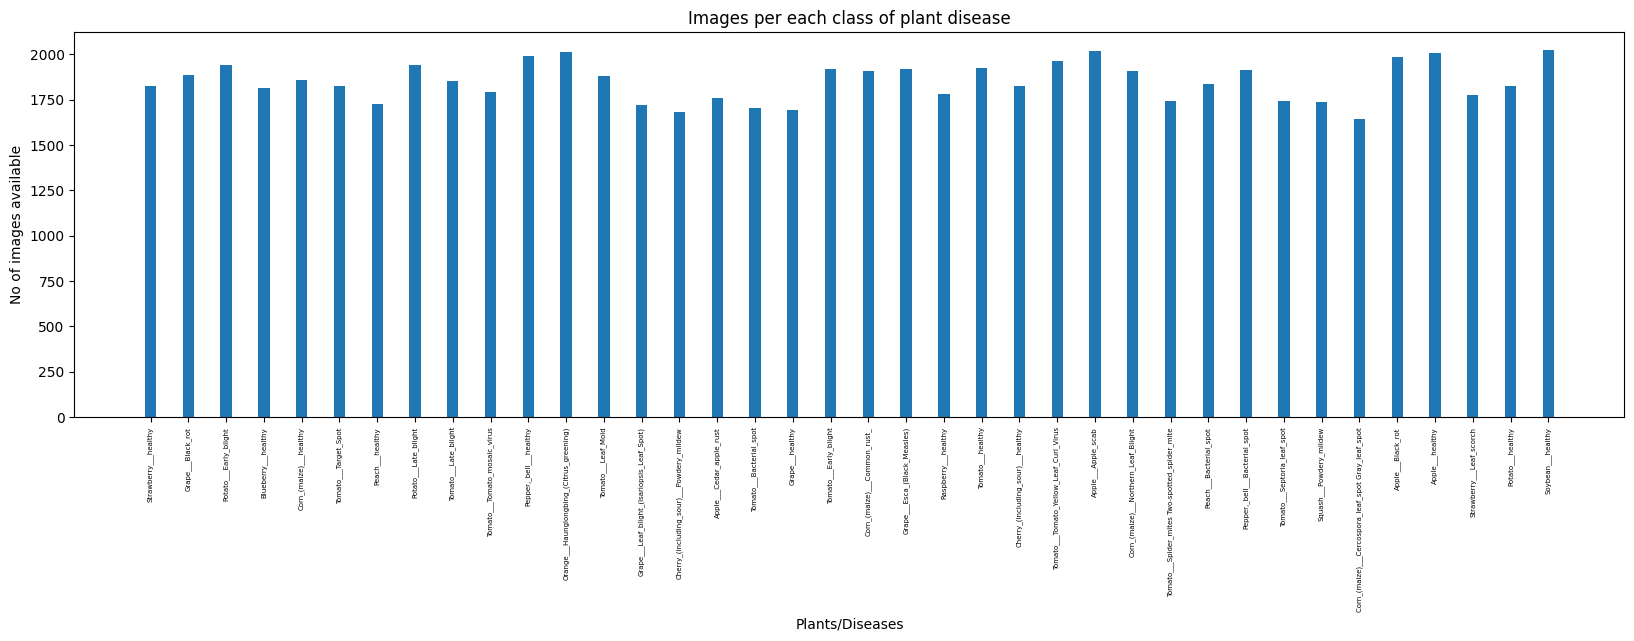

In [8]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [9]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


In [10]:
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

In [11]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [12]:
len(train.classes)


38

In [13]:
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


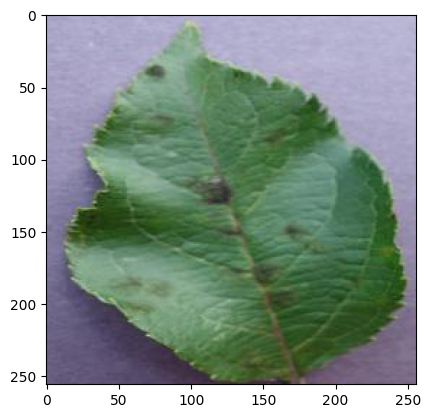

In [14]:
show_image(*train[0])

Label :Tomato___healthy(37)


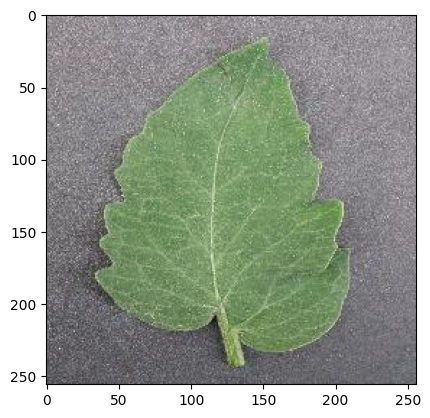

In [15]:
show_image(*train[70000])

In [16]:

image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)
grid_shape = (1, image_size, image_size, 3)

batch_size = 32

# Tiền xử lý dữ liệu 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = 224
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1./255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 70295 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


Trong bài toán phân loại nhiều lớp (multi-class) trên cây trồng, dữ liệu hình ảnh được tiền xử lý và tăng cường (augmentation) nhằm cải thiện khả năng học của mô hình. Cụ thể:

	1. Chuẩn hóa ảnh (Rescale): Tất cả giá trị pixel được chia cho 255 để đưa về khoảng [0,1]. Điều này giúp mô hình hội tụ nhanh hơn và tránh vấn đề gradient quá lớn.
	2.	Tăng cường dữ liệu (Data Augmentation):
	•	Xoay ngẫu nhiên (rotation_range=30): quay ảnh ±30 độ, giúp mô hình nhận diện cây ở nhiều góc khác nhau.
	•	Dịch ngang/dọc (width_shift_range=0.2, height_shift_range=0.2): dịch ảnh tối đa 20% kích thước, mô hình học được sự dịch chuyển của đối tượng.
	•	Thu phóng (zoom_range=0.2): phóng/thu ảnh ±20%, giúp mô hình quen với các kích thước khác nhau.
	•	Xoay nghiêng hình học (shear_range=0.2): tạo các góc nhìn nghiêng, tăng tính đa dạng.
	•	Lật ngang (horizontal_flip=True): lật trái/phải để mô hình nhận diện đối tượng không phụ thuộc chiều.
	•	Điền pixel trống (fill_mode=“nearest”): khi thao tác augmentation tạo vùng trống, điền bằng pixel gần nhất.
	3.	Chia tập dữ liệu:
	•	Tập huấn luyện (train): áp dụng augmentation, batch size = 32, ảnh resize về 224×224, nhãn dạng one-hot encoding.
	•	Tập validation: lấy 20% dữ liệu từ tập train (validation_split=0.2) để đánh giá hiệu năng mô hình trong huấn luyện, không áp dụng các augmentation mạnh, chỉ chuẩn hóa.
	•	Tập test: chỉ rescale, giữ nguyên dữ liệu thực, dùng để dự đoán và báo cáo kết quả cuối cùng.


In [18]:
cats = list(train_generator.class_indices.keys())

In [19]:
test_aug = ImageDataGenerator(
    rescale=1/255.0
)
test_data = test_aug.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 33 images belonging to 1 classes.


In [20]:
mbnet_v2 = keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape
)

mbnet_v2.trainable = False

In [21]:
# Define the layers
inputs = keras.Input(shape=input_shape)

# Get the layer
x = mbnet_v2(inputs, training = False)

# Stack layers further
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(cats), activation="softmax")(x)

# Combine the model
model = Model(inputs=inputs, outputs=x)

# Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        48,678 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,306,662 (8.80 MB)

 Trainable params: 48,678 (190.15 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [22]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

early_stopping_cb = callbacks.EarlyStopping(monitor="loss", patience=3)

In [23]:
epochs = 20

# Train model
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=150,
    callbacks=[early_stopping_cb]
)

/opt/homebrew/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 367ms/step - accuracy: 0.1067 - loss: 4.3379
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 52s 345ms/step - accuracy: 0.3269 - loss: 2.5003
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 362ms/step - accuracy: 0.4798 - loss: 1.8457
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 51s 341ms/step - accuracy: 0.6044 - loss: 1.3204
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 322ms/step - accuracy: 0.6617 - loss: 1.1271
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 321ms/step - accuracy: 0.6815 - loss: 1.0913
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 50s 331ms/step - accuracy: 0.6767 - loss: 1.0771
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 322ms/step - accuracy: 0.7231 - loss: 0.9344
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 47s 316ms/step - accuracy: 0.7619 - loss: 0.7940
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 49s 324ms/step - accuracy: 0.7387 - loss: 0.8454
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 51s 342ms/step - accuracy: 0.7804 - loss: 0.7249
Epoch 12/20
150/150

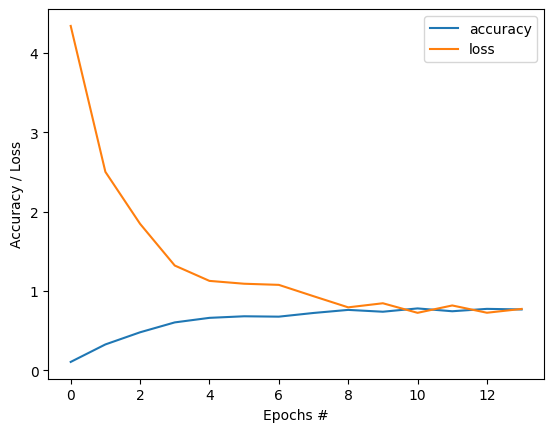

In [24]:

hist = history.history
plt.plot(hist["accuracy"], label="accuracy")
plt.plot(hist["loss"], label="loss")

if "val_accuracy" in hist and "val_loss" in hist:
    plt.plot(hist["val_accuracy"], label="val_accuracy")
    plt.plot(hist["val_loss"], label="val_loss")
plt.ylabel("Accuracy / Loss")
plt.xlabel("Epochs #")
plt.legend()
plt.show()


In [25]:
model.save("plant_disease_detection_4.h5")

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 696s 316ms/step
=== 📘 Kết quả đánh giá mô hình trên tập TRAIN ===
Accuracy : 79.83%
Precision: 85.96%
Recall   : 79.83%
F1-score : 79.94%

=== Báo cáo chi tiết từng lớp ===
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.65      0.90      0.75      2016
                                 Apple___Black_rot       0.92      0.86      0.89      1987
                          Apple___Cedar_apple_rust       1.00      0.41      0.58      1760
                                   Apple___healthy       0.84      0.93      0.88      2008
                               Blueberry___healthy       0.85      0.95      0.90      1816
          Cherry_(including_sour)___Powdery_mildew       0.98      0.88      0.93      1683
                 Cherry_(including_sour)___healthy       0.93      0.95      0.94      1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.

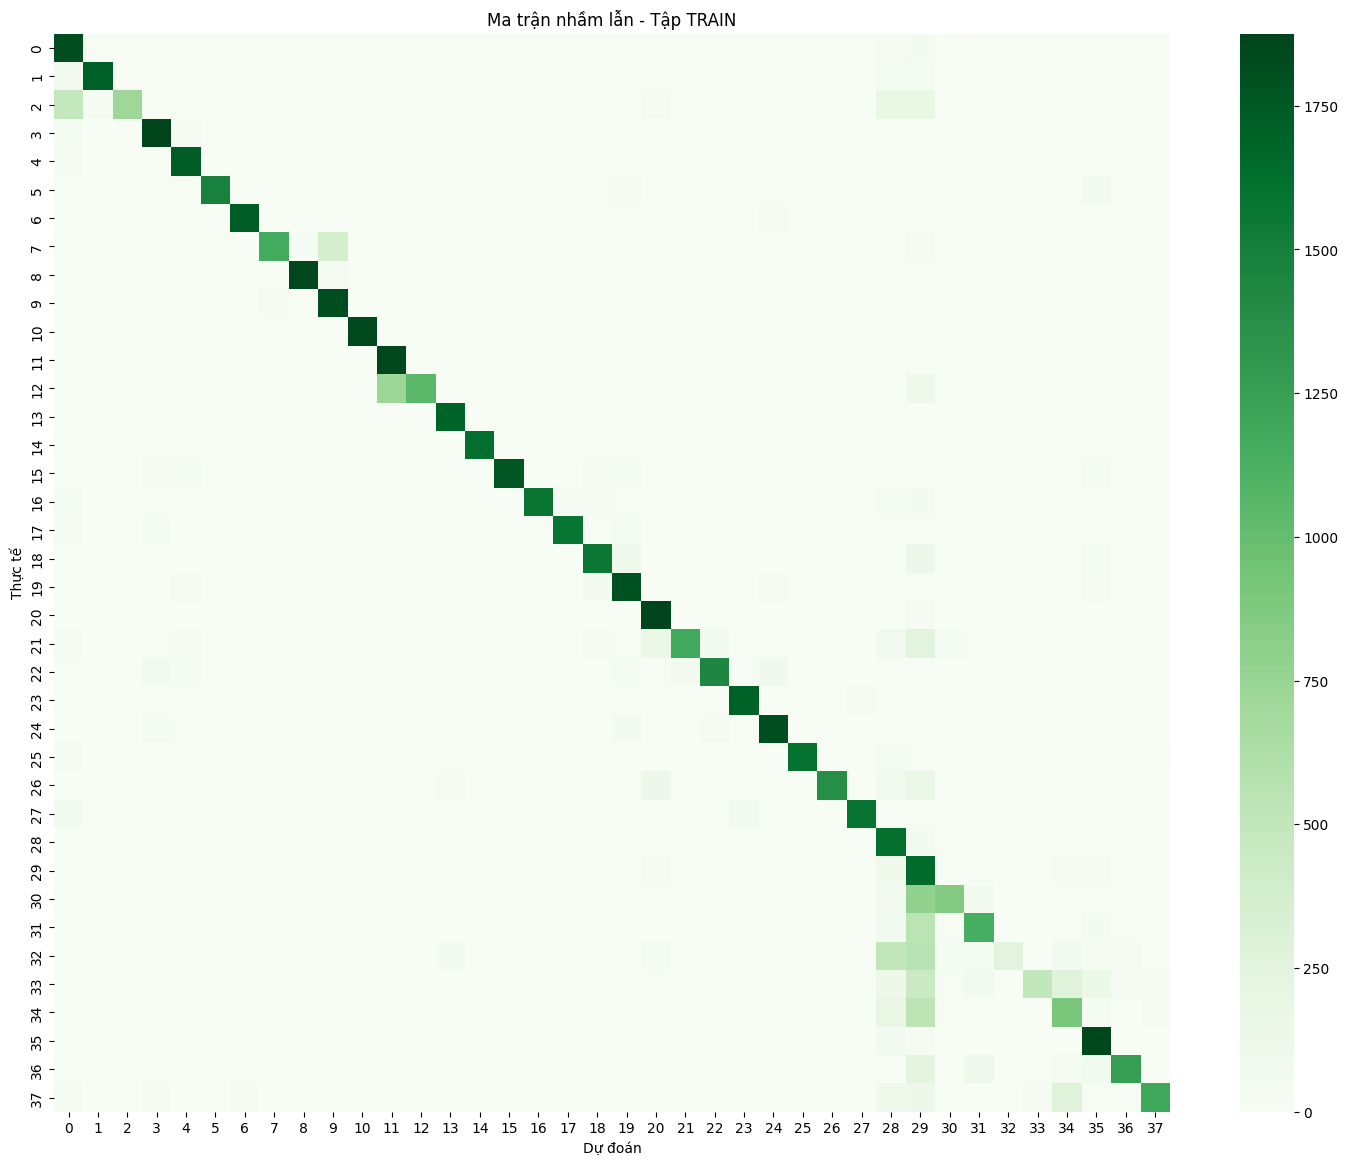

In [26]:
y_pred = model.predict(train_generator)
y_pred_classes = np.argmax(y_pred, axis=1)   # Lớp dự đoán
y_true = train_generator.classes              # Lớp thật
class_labels = list(train_generator.class_indices.keys())

# ---- 2. Tính các chỉ số ----
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("=== 📘 Kết quả đánh giá mô hình trên tập TRAIN ===")
print(f"Accuracy : {acc*100:.2f}%")
print(f"Precision: {prec*100:.2f}%")
print(f"Recall   : {recall*100:.2f}%")
print(f"F1-score : {f1*100:.2f}%")
print("\n=== Báo cáo chi tiết từng lớp ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# ---- 3. Ma trận nhầm lẫn ----
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(18, 14))
sns.heatmap(cm, annot=False, cmap="Greens", fmt='g')
plt.title("Ma trận nhầm lẫn - Tập TRAIN")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

1. Accuracy : 79.83%
	•	Accuracy (độ chính xác) = số dự đoán đúng chia cho tổng số mẫu.
	•	Với 38 lớp nhãn, 79.83% nghĩa là khoảng 3/4 các mẫu trong tập train được mô hình dự đoán chính xác.
	•	Đây là kết quả trên tập train, không phải trên test, nên nó phản ánh khả năng học của mô hình với dữ liệu đã thấy.

2. Precision: 85.96%
	•	Precision (độ chính xác theo lớp) đo lường tỉ lệ dự đoán đúng trên tổng số dự đoán trung bình có trọng số theo số mẫu từng lớp.
	•	85.96% nghĩa là khi mô hình dự đoán một lớp nào đó, khoảng 85% dự đoán là chính xác.

3. Recall: 79.83%
	•	Recall (độ nhạy) = số dự đoán đúng chia cho tổng số mẫu thực sự của lớp đó.
	•	Với 79.83%, tức là mô hình phát hiện đúng khoảng 3/4 mẫu thuộc mỗi lớp.

4. F1-score: 79.94%
	•	Với Precision và Recall, F1-score 79.94% là một con số hợp lý, phản ánh cân bằng giữa độ chính xác khi dự đoán và khả năng tìm đúng mẫu thực tế.

Kết luận mô hình dự đoán lớp khác tốt

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


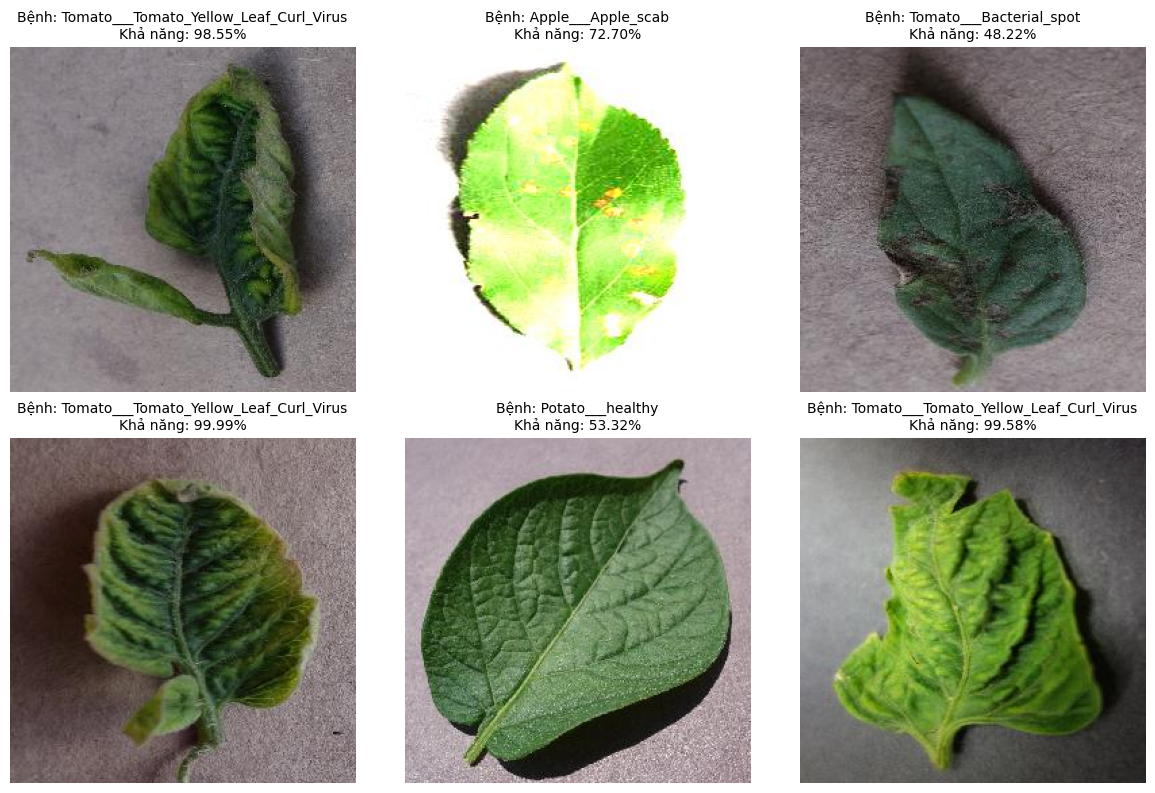

In [ ]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Tạo danh sách ảnh từ thư mục test
all_images = []
for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)
    for img_name in os.listdir(folder_path):
        all_images.append(os.path.join(folder_path, img_name))

# Chọn ngẫu nhiên 6 ảnh
sample_images = random.sample(all_images, 6)

plt.figure(figsize=(12, 8))

# Lấy danh sách tên lớp
class_labels = list(train_generator.class_indices.keys())

for i, img_path in enumerate(sample_images):
    # Đọc và tiền xử lý ảnh
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)[0]
    pred_label = class_labels[pred_class]
    confidence = pred[0][pred_class] * 100  # phần trăm khả năng dính bệnh
    plt.subplot(2, 3, i + 1)
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"Bệnh: {pred_label}\nKhả năng: {confidence:.2f}%", fontsize=10)

plt.tight_layout()
plt.show()